# Assignment 2 Exercise 3
# Group 3

Importing relevant modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import TensorBoard

Using TensorFlow backend.


The output consists of 4 classes/neurons:

"vertical digits": 1, 7<br>
"loopy digits": 0, 6, 8, 9<br>
"curly digits": 2, 5<br>
"other": 3, 4<br>

The labels of the training data have to be modified in order for the model to be trained. Each number corresponds to a category.

0 is "vertical digit"<br>
1 is "loopy digit"<br>
2 is "curly digit"<br>
3 is "other"<br>

Below we define function that modifies the original labels to the labels for the new categories. Also a function to translate this label to the category is defined

In [2]:
def classification_ex3(y): #This function converts the original label to a new label: 1 and 7s become 0 
    y_new = [] 
    for i in y: 
        if i in (1,7):
            y_label = 0 #"vertical digit"
        elif i in (0,6,8,9):
            y_label = 1 #"loopy digit"
        elif i in (2,5):
            y_label = 2 #"curly digit"
        else:
            y_label = 3 #"other"
        y_new.append(y_label)
    return y_new

In [3]:
def label2text(l): #This function translates the new label to its corresponding category
    newlist=[]
    for i in l:
        if type(i)!=int:
            j=np.argmax(i) 
            i=j
        if i==0:
            label="vertical digit"
        elif i==1:
            label="loopy digit"
        elif i==2:
            label="curly digit"
        elif i==3:
            label="other" 
        newlist.append(label)
    return newlist

The data is modified here and we print to see if everything is done correctly

In [4]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_newtrain = classification_ex3(y_train)
y_newtest = classification_ex3(y_test)
print("New labels: ",y_newtrain[:5]) #To check if the labels have been modified correctly
print("Old labels: ",y_train[:5])
print("Class: ",label2text(y_newtrain[:5]))

New labels:  [2, 1, 3, 0, 1]
Old labels:  [5 0 4 1 9]
Class:  ['curly digit', 'loopy digit', 'other', 'vertical digit', 'loopy digit']


Reshaping the data in the correct format and defining our model

In [5]:
# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
y_train = y_newtrain
y_test = y_newtest
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)

# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxH, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255


# convert 1D class arrays to 10D class matrices -- Unlike the previous exercise we require a 4D class matrix
y_train = np_utils.to_categorical(y_train, 4)    
y_val = np_utils.to_categorical(y_val, 4)
y_test = np_utils.to_categorical(y_test, 4)


model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='relu'))

# output layer with 10 nodes (one for each class) and softmax nonlinearity --- Instead of 10 nodes, 4 nodes
model.add(Dense(4, activation='softmax')) 


# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="Ex2.3 - one layer 64 neurons"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/" + model_name)


In [6]:
# train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])
score = model.evaluate(X_test, y_test, verbose=0)
model.save('num_reader.model')

print("Loss: ",score[0])
print("Accuracy: ",score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 100us/step - loss: 0.5746 - acc: 0.8009 - val_loss: 0.4145 - val_acc: 0.8628
Epoch 2/10
54000/54000 [==============================] - 5s 90us/step - loss: 0.3388 - acc: 0.8923 - val_loss: 0.3187 - val_acc: 0.9002
Epoch 3/10
54000/54000 [==============================] - 5s 85us/step - loss: 0.2670 - acc: 0.9169 - val_loss: 0.2680 - val_acc: 0.9155
Epoch 4/10
54000/54000 [==============================] - 5s 87us/step - loss: 0.2276 - acc: 0.9300 - val_loss: 0.2365 - val_acc: 0.9270
Epoch 5/10
54000/54000 [==============================] - 5s 85us/step - loss: 0.2020 - acc: 0.9382 - val_loss: 0.2158 - val_acc: 0.9323
Epoch 6/10
54000/54000 [==============================] - 5s 86us/step - loss: 0.1828 - acc: 0.9449 - val_loss: 0.2010 - val_acc: 0.9367
Epoch 7/10
54000/54000 [==============================] - 5s 84us/step - loss: 0.1678 - acc: 0.9492 - val_loss: 0.1884 - val_acc

# Testing predictions

The model is tested on the test data and it puts the 9 in the correct category

In [7]:
new = tf.keras.models.load_model('num_reader.model')
predictions = new.predict([X_test])
np.argmax(predictions[0]) #return index of max value 
l2t = label2text(y_test)

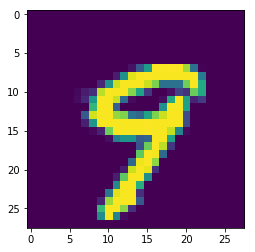

loopy digit


In [8]:
q = 8955 #index in test data
X_testshow = np.resize(X_test[q],(28,28))
plt.imshow(X_testshow)
plt.show()
print(l2t[q])